# Part II: Data analysis

![](img/analysis.png)

In this section we'll learn:
- How to obtain simple insights from the data
- How to generate simple plots
- Groupping data and computing aggregates
- Basic time series operations

In [1]:
import os
import pandas 

#movies = pandas.read_json(os.path.join('data', 'movies_clean.jsonl.bz2'), lines=True).set_index('imdb_id')

movies = pandas.read_json('movies_clean.jsonl.bz2', lines=True).set_index('imdb_id')

In [2]:
movies.head()

cast certificate  \
imdb_id                                                                    
tt5474036  [{'imdb_id': 'nm3966456', 'name': 'Tapsee Pann...    12A|\n »   
tt5970844  [{'imdb_id': 'nm0451148', 'name': 'Aamir Khan'...        None   
tt8108202  [{'imdb_id': 'nm3822770', 'name': 'Rajkummar R...     15|\n »   
tt7720922  [{'imdb_id': 'nm1372788', 'name': 'Shahid Kapo...     PG|\n »   
tt5080556  [{'imdb_id': 'nm0707425', 'name': 'Rajinikanth...        None   

           color  country                      genres  gross  \
imdb_id                                                        
tt5474036  Color  [India]                   [Romance]    5.0   
tt5970844  Color  [India]         [Action, Adventure]    NaN   
tt8108202  Color  [India]            [Comedy, Horror]    NaN   
tt7720922  Color  [India]                     [Drama]    1.0   
tt5080556  Color  [India]  [Action, Sci-Fi, Thriller]    NaN   

                         language  num_ratings  \
imdb_id                                          
tt5474036                 [Hindi]       1756.0   
tt5970844  [Hindi, Tamil, Telugu]          NaN   
tt8108202                 [Hindi]       7531.0   
tt7720922                 [Hindi]       1410.0   
tt5080556  [Tamil, Telugu, Hindi]          NaN   

                                                       photo  \
imdb_id                                                        
tt5474036  https://m.media-amazon.com/images/M/MV5BNTU3Zj...   
tt5970844  https://m.media-amazon.com/images/M/MV5BMTA3OD...   
tt8108202  https://m.media-amazon.com/images/M/MV5BMjk4NG...   
tt7720922  https://m.media-amazon.com/images/M/MV5BNzdiNW...   
tt5080556  https://m.media-amazon.com/images/M/MV5BZDE4MG...   

                                               plot_keywords  \
imdb_id                                                        
tt5474036                                               None   
tt5970844                                   [based on novel]   
tt8108202  [father son relationship, friendship, prostitu...   
tt7720922                                               None   
tt5080556                                    [sequel, robot]   

                         production_co  rate  release_date  runtime  \
imdb_id                                                               
tt5474036  [Colour Yellow Productions]   7.0  1.536883e+12    156.0   
tt5970844                           []   NaN  1.541635e+12      NaN   
tt8108202                  [D2R Films]   8.3  1.535674e+12    128.0   
tt7720922              [Krti Pictures]   6.4  1.537488e+12    161.0   
tt5080556                    [Dakshaa]   NaN  1.543450e+12      NaN   

                                                   storyline  \
imdb_id                                                        
tt5474036  The film is a love story set in Punjab where A...   
tt5970844                                               None   
tt8108202  Chanderi village is haunted for years by a wit...   
tt7720922  S.K, Nauti, and Tripathi are childhood friends...   
tt5080556  Dr. Vaseegaran is forced to reassemble Chitti ...   

                                                     summary  \
imdb_id                                                        
tt5474036  The film is a love story set in Punjab where A...   
tt5970844                                               None   
tt8108202  In the small town of Chanderi, the menfolk liv...   
tt7720922    A social movie about escalating electric bills.   
tt5080556  Dr. Vaseegaran is forced to reassemble Chitti ...   

                           title    year  
imdb_id                                   
tt5474036       Husband Material  2018.0  
tt5970844     Thugs of Hindostan  2018.0  
tt8108202                  Stree  2018.0  
tt7720922  Batti Gul Meter Chalu  2018.0  
tt5080556                    2.0  2018.0

In [3]:
movies.tail()

cast certificate  \
imdb_id                                                                    
tt9046206  [{'imdb_id': 'nm10148511', 'name': 'Madhu Sing...        None   
tt9052958                                                 []        None   
tt9052964  [{'imdb_id': 'nm0332871', 'name': 'Govinda', '...        None   
tt9053392                                                 []        None   
tt9060700  [{'imdb_id': 'nm10150444', 'name': 'Krishna Ga...        None   

           color  country    genres  gross language  num_ratings  \
imdb_id                                                            
tt9046206  Color  [India]   [Drama]    NaN  [Hindi]          NaN   
tt9052958  Color  [India]      None    NaN  [Hindi]          NaN   
tt9052964  Color  [India]  [Comedy]    NaN  [Hindi]          NaN   
tt9053392  Color  [India]  [Action]    NaN  [Hindi]          NaN   
tt9060700  Color  [India]   [Drama]    NaN  [Hindi]          NaN   

                                                       photo plot_keywords  \
imdb_id                                                                      
tt9046206  https://m.media-amazon.com/images/M/MV5BNWFiMG...          None   
tt9052958                                               None          None   
tt9052964                                               None          None   
tt9053392                                               None          None   
tt9060700                                               None          None   

                                               production_co  rate  \
imdb_id                                                              
tt9046206                                               None   NaN   
tt9052958                                                 []   NaN   
tt9052964                                                 []   NaN   
tt9053392                                               None   NaN   
tt9060700  [Golden Triangle Charity Trust, Sylph Producti...   NaN   

           release_date  runtime                                  storyline  \
imdb_id                                                                       
tt9046206  1.545955e+12      NaN                                       None   
tt9052958           NaN      NaN  Movie is adaptation of the epic Ramayana.   
tt9052964           NaN      NaN                                       None   
tt9053392           NaN      NaN                                       None   
tt9060700           NaN     90.0                                       None   

                                             summary            title    year  
imdb_id                                                                        
tt9046206                                       None  Pariwar ae babu  2018.0  
tt9052958  Movie is adaptation of the epic Ramayana.           Ramyug  2019.0  
tt9052964                                       None    Rangeela Raja  2018.0  
tt9053392                                       None       Rannbhoomi  2020.0  
tt9060700                                       None   The Check Post  2019.0

In [4]:
movies.sort_values('rate', ascending=False).head(10)[['title', 'rate', 'num_ratings', 'release_date']]

title  rate  num_ratings  release_date
imdb_id                                                            
tt9059202             Kuch Der Aur  10.0          5.0  1.538266e+12
tt7028460         Three and a Half   9.7         95.0  1.531786e+12
tt8551394                   Kathor   9.6          5.0           NaN
tt4946222   Man on Mission Fauladi   9.4         64.0  1.072915e+12
tt8453246                 Jhakaas!   9.4          5.0  1.536797e+12
tt7282370                      Who   9.4         19.0  1.540426e+12
tt4944418  Man On Mission Jaanbaaz   9.4         68.0  1.104538e+12
tt5963908          T for Taj Mahal   9.3         71.0  1.529712e+12
tt8080354      Mitti-back to roots   9.3         30.0  1.516925e+12
tt7613166                      Dhh   9.2         30.0  1.538093e+12

### Highest rated movies

Back from our previous example, let us see which are the highest rated movies.

We can easily sort our data by a column with the `DataFrame.sort_values()` method. It takes a boolean argument `ascending`.

**Exercise:** Get the top 10 rated movies.

In [5]:
%timeit movies.nlargest(10, 'rate')

4.96 ms ± 24.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


`pandas` provides the method `.nlargest()` to perform this operation. The reason, is that sorting a large `DataFrame`, just to find the top 10 values is very inefficient.

**Exercise:** Obtain again the top 10 rated movies, this time with `.nlargest()`. And compare the difference of time between them. Jupyter provides the magic `%timeit` that display how long a line of code takes.

In [6]:
movies['num_ratings'].describe()

count      5609.000000
mean       1866.771617
std       12248.980281
min           5.000000
25%          18.000000
50%          68.000000
75%         521.000000
max      722712.000000
Name: num_ratings, dtype: float64

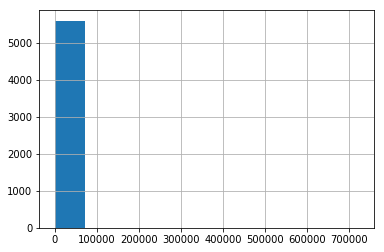

In [7]:
%matplotlib inline
movies['num_ratings'].hist()

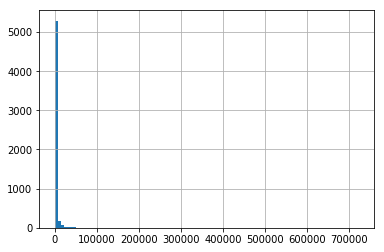

In [8]:
movies['num_ratings'].hist(bins=100)

In [9]:
movies[['rate', 'num_ratings']].corr()

rate  num_ratings
rate         1.000000     0.127945
num_ratings  0.127945     1.000000

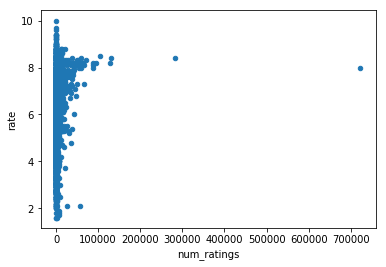

In [10]:
movies.plot(kind='scatter', x='num_ratings', y='rate')

Did you watch any of them? Do you think are the best Bollywood movies of history?

Something interesting is that not so many people voted for them. So the rating is based in the opinions of not many people. In this dataset, how many votes is it "normal" to have for a movie?

**Exercises:**
- Get some statistics about the number of votes (min, max, median, mean, quantiles...)
- Plot a histogram with the distribution (pandas provides the method `Series.hist()` to plot histograms). Change the number of `bins` and see how it changes.

In [11]:
movies.nlargest(5, 'num_ratings')

cast     certificate  \
imdb_id                                                                        
tt1010048  [{'imdb_id': 'nm2353862', 'name': 'Dev Patel',...            None   
tt1187043  [{'imdb_id': 'nm0451148', 'name': 'Aamir Khan'...            None   
tt0986264  [{'imdb_id': 'nm2594301', 'name': 'Darsheel Sa...            None   
tt2338151  [{'imdb_id': 'nm0451148', 'name': 'Aamir Khan'...  Not Rated|\n »   
tt5074352  [{'imdb_id': 'nm0451148', 'name': 'Aamir Khan'...  Not Rated|\n »   

           color                            country  \
imdb_id                                               
tt1010048  Color  [UK, USA, France, Germany, India]   
tt1187043  Color                            [India]   
tt0986264  Color                            [India]   
tt2338151  Color                            [India]   
tt5074352  Color                            [India]   

                                      genres  gross  \
imdb_id                                               
tt1010048                   [Drama, Romance]    1.0   
tt1187043                    [Comedy, Drama]    6.0   
tt0986264                    [Drama, Family]    1.0   
tt2338151                    [Comedy, Drama]    1.0   
tt5074352  [Action, Biography, Drama, Sport]    1.0   

                                           language  num_ratings  \
imdb_id                                                            
tt1010048          [English, Hindi, French, German]     722712.0   
tt1187043                          [Hindi, English]     282048.0   
tt0986264                          [Hindi, English]     129723.0   
tt2338151  [Hindi, English, Urdu, Persian, Kurdish]     127507.0   
tt5074352                    [Hindi, Tamil, Telugu]     105171.0   

                                                       photo  \
imdb_id                                                        
tt1010048  https://m.media-amazon.com/images/M/MV5BZmNjZW...   
tt1187043  https://m.media-amazon.com/images/M/MV5BNTkyOG...   
tt0986264  https://m.media-amazon.com/images/M/MV5BNTVmYT...   
tt2338151  https://m.media-amazon.com/images/M/MV5BMTYzOT...   
tt5074352  https://m.media-amazon.com/images/M/MV5BMTQ4Mz...   

                                               plot_keywords  \
imdb_id                                                        
tt1010048  [india, television show, contestant, underdog,...   
tt1187043  [bollywood, against the system, suicide, suici...   
tt0986264  [dyslexia, dream, intolerance, special educati...   
tt2338151  [religion, letter in title, indian, indian abr...   
tt5074352  [small town, father daughter relationship, mal...   

                                           production_co  rate  release_date  \
imdb_id                                                                        
tt1010048                  [Warner Bros., Celador Films]   8.0  1.230163e+12   
tt1187043                                             []   8.4  1.261613e+12   
tt0986264                       [Aamir Khan Productions]   8.4  1.198195e+12   
tt2338151                        [Rajkumar Hirani Films]   8.2  1.418947e+12   
tt5074352  [Aamir Khan Productions, UTV Motion Pictures]   8.5  1.482278e+12   

           runtime                                          storyline  \
imdb_id                                                                 
tt1010048    120.0  The story of Jamal Malik, an 18 year-old orpha...   
tt1187043    170.0  Farhan Qureshi and Raju Rastogi want to re-uni...   
tt0986264    165.0  Ishaan Awasthi is an eight-year-old child whos...   
tt2338151    153.0  P. K. is a comedy of ideas about a stranger in...   
tt5074352    140.0                                          Biopic of   

                                                     summary  \
imdb_id                                                        
tt1010048  A Mumbai teen reflects on his upbringing in th...   
tt1187043  Two friends are searching for their long lost ...   
tt0986264  An eight

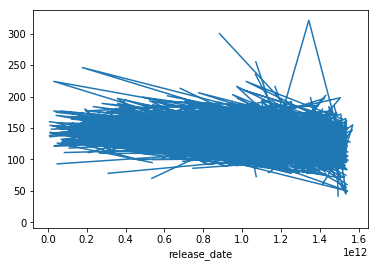

In [12]:
movies.set_index('release_date')['runtime'].plot()

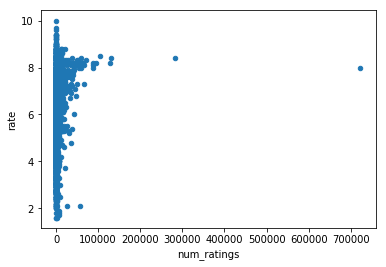

In [17]:
movies.plot(kind='scatter', x='num_ratings', y='rate')

What we are interested, is to know whether there is a correlation between the rating and the number of people who rated the movie. To see how they are related we can analyze the correlation, and we can plot both variables.

**Exercises:**
- Compute the correlation between the two variables (`DataFrame.corr()` computes the correlation among all the columns in a `DataFrame`).
- Generate a scatter plot with the data (`pandas` provides many plots, in most cases we want to use the method `.plot(kind=kind)` where `kind` can be `line`, `bar`, `barh`, `scatter`...).
- Which are the movies that have very large number of ratings?
- Generate the scatter plot without these values. `Series.quantile()` is used often to detect extreme values, as it can report the value containing for example 95% of the samples.

### Movie duration over time

Let us analyze something different now. The question is, whether the duration of Bollywood changed over time, and in which way.

We have already seen, that plotting data can help find answers to our questions.

**Exercise:** Plot the duration of the movie as a function of the release date of the movie. In this case, it can be useful to plot a line plot. For line plots we usually set the column we want in the `x` axis of the plot as the index. The columns of the `DataFrame` will be plotted as lines. 

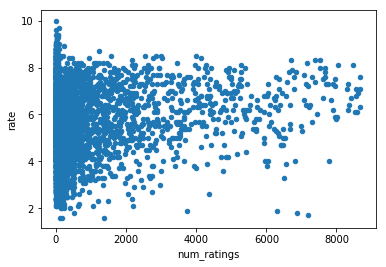

In [13]:
movies[movies.num_ratings < movies.num_ratings.quantile(.95)].plot(kind='scatter', x='num_ratings', y='rate')

Plotting with the original granularity (one point per movie) can be very noise. But `pandas` can easily aggregate data, including time series data. To change the frequency of the data, `DataFrame.resample` exists. `reample` receives a parameter with the new frequency, for example `D` for day, `M` for month, `Q` for quarter, and more specific frequencies like `2M` for 2 months can be used. The result of `resample` is a `GroupBy` object, and we need to specify the aggregate function that we want to use on it, for example `mean`, `median`...

**Exercise:** Resample the `release_date` to a quarter frequency, and plot the median of the runtime over it.

In [18]:
movies.set_index('release_date').resample('Q')['runtime'].median().plot()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Float64Index'

Similar to `resample`, `pandas` provides a `groupby` method that can group discrete values, for example strings. The syntax is similar, but the column to group by is not expected to be the index, and to specify which of the columns to group by, we provide the name as a parameter: `movies.groupby(column_to_group_by)`.

**Exercise:** Group the data by the column color, and check whether in average color movies are longer or shorter than black and white movies.

In [15]:
movies.groupby('color')['runtime'].median()

color
Black and White    125.0
Color              133.0
Name: runtime, dtype: float64